# Some Statistical Inference

In [4]:
import pandas as pd
import numpy as np
import ast
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import sys

In [5]:
df = pd.read_csv("../DataFiles/zomato_clean_data_csv/zomato_clean_data.csv")

df.index = df["restaurant_ID"]
df.drop(["restaurant_ID"],axis=1,inplace=True)

plt.style.use('ggplot')

Index(['restaurant_link', 'restaurant_name', 'locality', 'restaurant_category',
       'zomato_gold', 'discounts', 'photos_taken', 'rating', 'votes',
       'cuisines', 'approx_cost_for_2', 'opening_timings', 'address',
       'latitude', 'longitude', 'more_info', 'featured_in', 'known_for',
       'most_liked_Food', 'most_liked_Service', 'most_liked_Look & Feel',
       'reviews'],
      dtype='object')

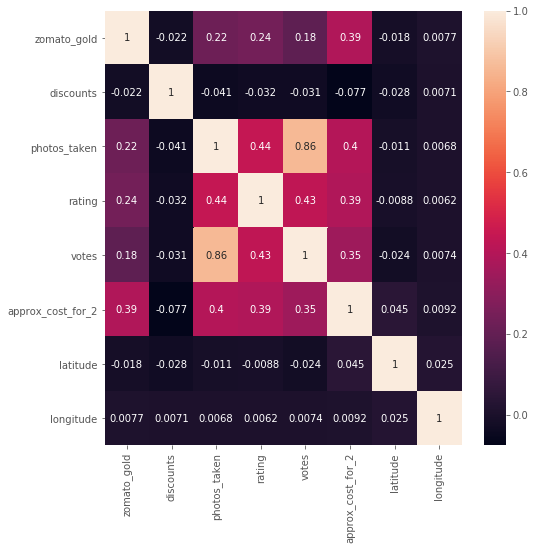

In [7]:
#getting correlations in different variables 
corr = df.corr(method='pearson')
plt.figure(figsize=(8,8))
ax = sns.heatmap(corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
df.columns

** **

<div class="span5 alert alert-info">
<b>    
Null hypothesis test to verify the statistical significance of correlation coeficient between approx_cost_for_2 and rating.
</b>    
</div>


We see a positive correlation between approx_cost_for_2 and ratings.To see how statistically significant corelation is on the population lets take samples and conduct statistical significance test.Lets do a Null hypothesis to test the significance.

H0= Null hypothesis: The correlation coeff = 0 that is, there is no correlation between approx_cost_for_2 and ratings.
H1= Alternative hypothesis: The correlation coeff > 0 which means approx_cost_for_2 and ratings are positively correlated.


In [8]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]

In [9]:
df.dropna(subset = ['approx_cost_for_2','rating'], inplace=True) #dropping rows with nan values

cost_arr = df['approx_cost_for_2']
ratings_arr = df['rating']

perm_replicates = np.empty(len(cost_arr))
r_obs = pearson_r(cost_arr,ratings_arr)
r_obs


0.3910780518560095

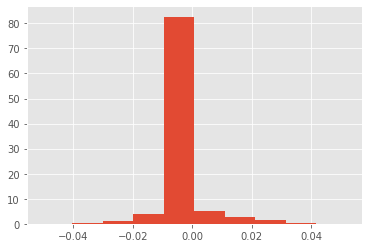

0.0

In [10]:
#Getting sampling distribution of person coeff for a 1000 samples

for i in range(1000):
    cost_arr_permuted = np.random.permutation(cost_arr)
    perm_replicates[i] = pearson_r(cost_arr_permuted, ratings_arr)

#plotting the replicates
_ = plt.hist(perm_replicates, bins=10, density=True)
plt.show()

#Compute p-value: p
pval = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
pval

**Since the pvalue is very very small, there is a very small chance to get observed coeffcient value under the assumption of null hypothesis to be true.So,we reject the null hypothesis and accept the alternative hypothesis.**  

** **

<div class="span5 alert alert-info">
<b>    
Null hypothesis test to verify the statistical significance of zomato gold rating over non zomato gold rating of restaurants.
</b>
</div>    

H0= Null hypothesis: The rating of zomato gold is same as a non zomato gold restaurant 
H1= Alternative hypothesis: The rating of zomato gold is greater than a non zomato gold rating.

In [11]:
df.dropna(subset=["rating"],inplace=True)

groupA = df[df['zomato_gold'] == 1]
groupB = df[df['zomato_gold'] == 0]

obs = np.mean(groupA['rating'])-np.mean(groupB['rating'])
obs

0.3706018814115044

We see a difference of 0.37 in the ratings of a zomato gold and non zomato gold rating which is the observed difference.Let difference in mean be the test statistic. 

In [12]:
sampleSize = 300
simulationCount = 1000

samplesA = np.empty(simulationCount)
samplesB = np.empty(simulationCount)
diffSamples = np.empty(simulationCount)
                    
for i in range(simulationCount):
    a = np.random.choice(groupA['rating'], sampleSize, replace=True)
    samplesA[i] = np.mean(a)
    
    b = np.random.choice(groupB['rating'], sampleSize, replace=True)
    samplesB[i] = np.mean(b)
    
    diffSamples[i] = samplesA[i] - samplesB[i] 


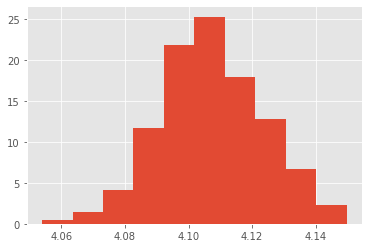

In [13]:
_ = plt.hist(samplesA,bins=10, density=True)

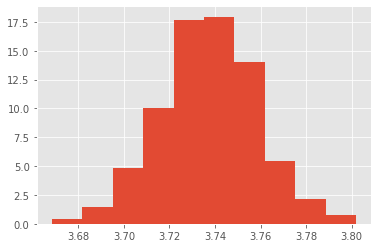

In [14]:
_ = plt.hist(samplesB,bins=10, density=True)

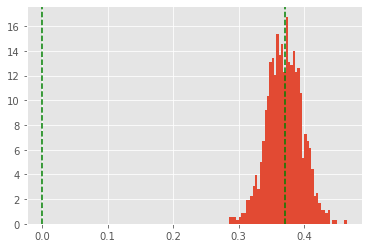

In [15]:
_ = plt.hist(diffSamples,bins=50, density=True)

_ = plt.axvline(obs, color='g', linestyle='--')
_ = plt.axvline(0, color='g', linestyle='--')#here expected mean diff is zero from null hyp and we are not shiftn the distrn 


In [16]:
pval = np.sum(diffSamples <= 0) / simulationCount 
pval

0.0

**The pval turns out to be very low which implies under null hypothesis to be true,so we reject the null hypothesis and accept the alternative hypothesis.**

For further modelling for rating prediction refer:
    
https://github.com/Anandpatil412/DSC/blob/master/CapstoneProject1/Zomato/In_depth_analysis.ipynb